## Tarefa A - A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.


In [ ]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

### 📘 2.1 – Descrição do Trabalho

O meu trabalho consiste na aplicação de **modelos de linguagem (LLMs)** para realizar a **sumarização automática de documentos internos** de uma empresa privada. O objetivo é **gerar novos documentos** a partir das informações extraídas, facilitando o acesso e reutilização de conhecimento institucional.

---

### 🎯 2.2 – Variável de Interesse

A **variável de interesse** escolhida é o **número de palavras (ou tokens)** que cada documento possui. Essa variável impacta diretamente o desempenho dos modelos LLM no processo de:

- **Recuperação de informações**
- **Geração de conteúdo**

---

### ⚙️ Parâmetros Selecionados para Simulação

- `mu = 5000` → **Média da distribuição** (μ)
- `desvio = 200` → **Desvio padrão da distribuição** (σ)
- `size = 300` → **Quantidade de valores gerados** (tamanho da amostra)

Esses parâmetros simulam uma distribuição de comprimentos de documentos, útil para analisar o impacto na performance das LLMs.


1000


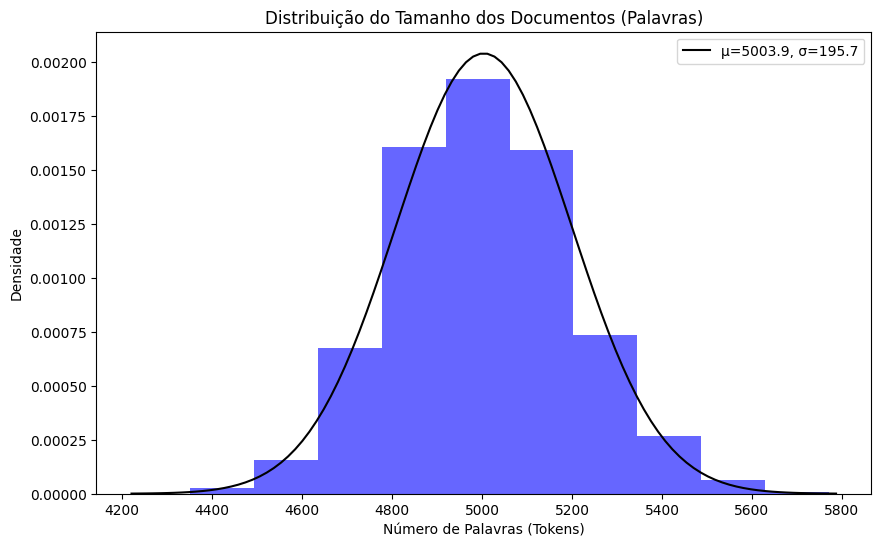

In [ ]:
# Definindo parâmetros da variável
mu = 5000  # Média da distribuição
desvio = 200  # Desvio padrão da distribuição
size=1000 # Quantidade de valores gerados(Amostra de dados)

# Criando a população artificial
np.random.seed(42)
population = np.random.normal(loc=mu, scale=desvio, size=size)

print(len(population))

# Visualizando a população
plt.figure(figsize=(10,6))
plt.hist(population, bins=10, density=True, alpha=0.6, color='blue')

# Curva normal ajustada
mu, sigma = np.mean(population), np.std(population)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k-', label=f'μ={mu:.1f}, σ={sigma:.1f}')

plt.title("Distribuição do Tamanho dos Documentos (Palavras)")
plt.xlabel("Número de Palavras (Tokens)")
plt.ylabel("Densidade")
plt.legend()
plt.show()

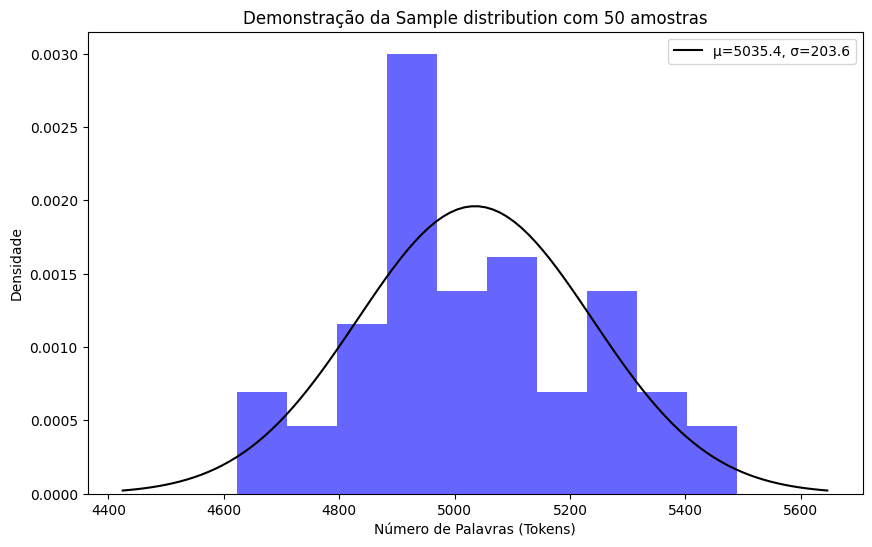

In [ ]:
# Tirando uma amostra
sample_size = 50
np.random.seed(42)  # para reprodutibilidade
sample = np.random.choice(population, size=sample_size)

# Curva normal ajustada
mu, sigma = np.mean(sample), np.std(sample)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = norm.pdf(x, mu, sigma)

# Mostrando a sample distribution
plt.figure(figsize=(10,6))
#sns.histplot(sample, bins=10, kde=True, color='skyblue')
plt.hist(sample, bins=10, density=True, alpha=0.6, color='blue')
plt.plot(x, pdf, 'k-', label=f'μ={mu:.1f}, σ={sigma:.1f}')
plt.title(f'Demonstração da Sample distribution com {sample_size} amostras')
plt.xlabel("Número de Palavras (Tokens)")
plt.ylabel("Densidade")
plt.legend()
plt.show()

1000


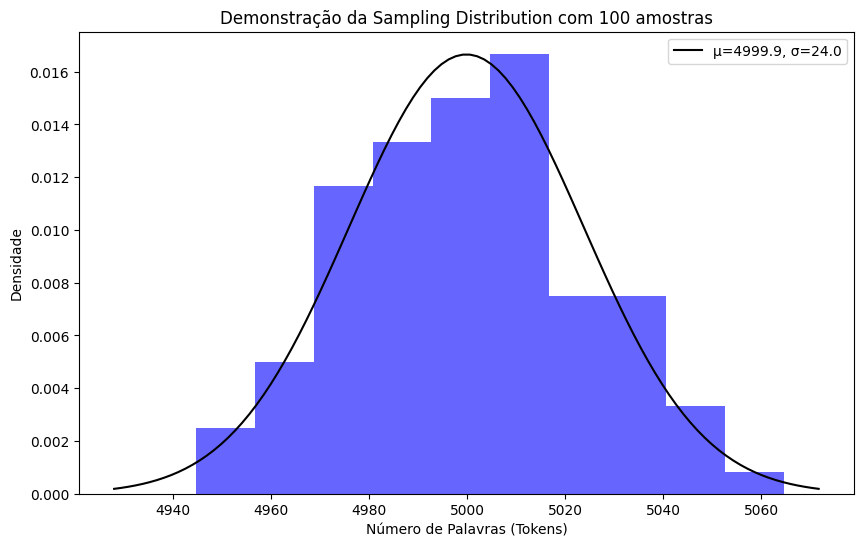

In [ ]:
# Criando sampling distribution
num_samples = 100
sample_size = 50
sample_means = []
print(len(population))
np.random.seed(42)  # para reprodutibilidade
for _ in range(num_samples):
    sample_i = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample_i))

# Curva normal ajustada
mu, sigma = np.mean(sample_means), np.std(sample_means)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = norm.pdf(x, mu, sigma)

# Mostrando a sample distribution
plt.figure(figsize=(10,6))
#sns.histplot(sample, bins=10, kde=True, color='skyblue')
plt.hist(sample_means, bins=10, density=True, alpha=0.6, color='blue')
plt.plot(x, pdf, 'k-', label=f'μ={mu:.1f}, σ={sigma:.1f}')
plt.title(f"Demonstração da Sampling Distribution com {num_samples} amostras")
plt.xlabel("Número de Palavras (Tokens)")
plt.ylabel("Densidade")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import norm

# Probabilidade de uma média amostral ser maior que 5000
p_maior_que_58 = 1 - norm.cdf(5100, loc=mu, scale=sigma)
print(f"P(média > 58) = {p_maior_que_58:.4f}")

P(média > 58) = 0.0000


## Tarefa B - Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.


## 📈 Introdução à Distribuição Gama

A **distribuição Gama** é uma distribuição contínua de probabilidade definida apenas para valores positivos. Ela é amplamente utilizada em estatística, aprendizado de máquina e ciência de dados para modelar **variáveis assimétricas**, como tempos de espera, duração de eventos, ou volumes acumulados.

A função densidade de probabilidade (PDF) da distribuição Gama depende de dois parâmetros:

- **α (alfa)**: parâmetro de forma
- **θ (teta)**: parâmetro de escala

A forma da curva muda conforme o valor de **α**, o que torna a distribuição Gama muito flexível:

- **Quando α = 1**: A distribuição se torna **Exponencial**
- **Quando α < 1**: Curva com **pico no zero** e **cauda longa**
- **Quando α > 1**: Curva em forma de **sino assimétrico**
- **Quando α → ∞**: Aproxima-se de uma **distribuição Normal**

A Gama é especialmente útil em contextos onde a variável de interesse é **positiva, contínua e assimétrica**, e pode descrever o **tempo até a ocorrência de um evento**.

### 📐 Fórmulas principais:

- **Média**:

  $$
  \mu = \alpha \cdot \theta
  $$

- **Variância**:

  $$
  \sigma^2 = \alpha \cdot \theta^2
  $$

- **Assimetria**:

  $$
  \text{Assimetria} = \frac{2}{\sqrt{\alpha}}
  $$

  #### Interpretação Prática da Assimetria

- **Assimetria = 0**: Distribuição **simétrica** (como a Normal)
- **Assimetria > 0**: **Cauda alongada à direita** (valores altos mais prováveis)
- **Assimetria < 0**: **Cauda alongada à esquerda** (valores baixos mais prováveis)


### 📊 Características da Distribuição Gama para α=2 e θ=4

- **Média teórica**:

  $$
  \mu = \alpha \times \theta = 2 \times 4 = 8
  $$

- **desvio padrão** :

  $$
  \sigma = \sqrt{\alpha} \cdot \theta = \sqrt{2} \cdot 4 \approx 1.4142 \cdot 4 = 5.6568
  $$

- **Variância teórica**:

  $$
  \sigma^2 = \alpha \times \theta^2 = 2 \times 16 = 32
  $$

- **Assimetria**:
  $$
  \text{Assimetria} = \frac{2}{\sqrt{\alpha}} = \frac{2}{\sqrt{2}} \approx 1.414
  $$
  (Distribuição positivamente assimétrica)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

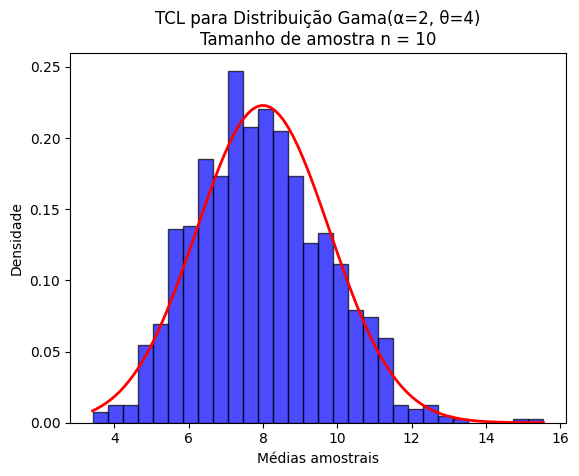

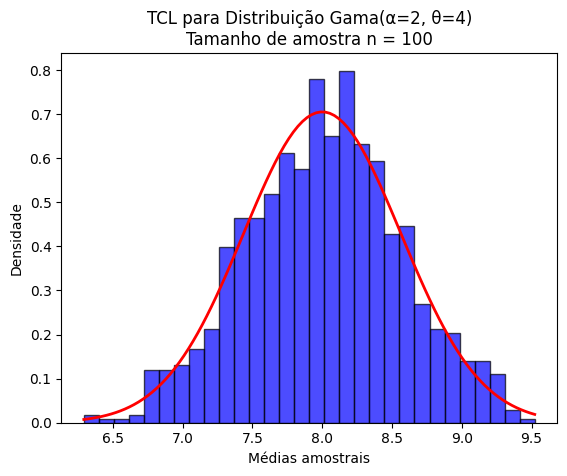

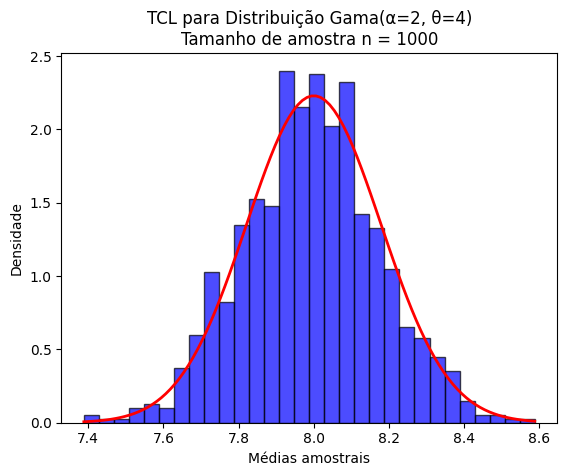

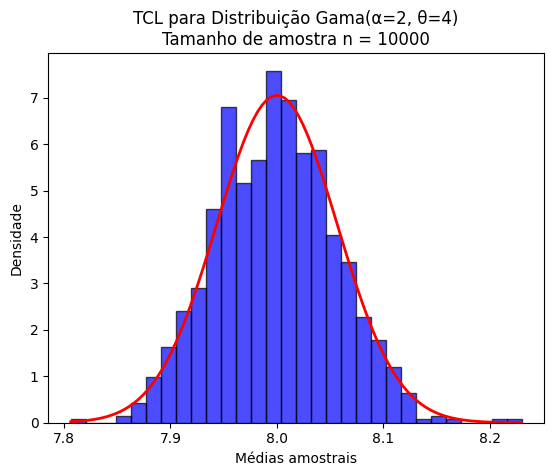

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

# Parâmetros da distribuição Gama
alfa = 2     # α (alfa)
scale = 4    # θ ou scale

# Tamanhos das amostras
tamanhos_amostras = [10, 100, 1000, 10000]

# Número de repetições
num_amostras = 1000

# Loop para cada tamanho de amostra
for n in tamanhos_amostras:
    medias = []

    # Gerar 1000 amostras e calcular a média de cada uma
    for _ in range(num_amostras):
        amostra = gamma.rvs(a=alfa, scale=scale, size=n)
        medias.append(np.mean(amostra))

    # Mostrar o histograma das médias
    plt.hist(medias, bins=30, color='blue', edgecolor='black', alpha=0.7, density=True)

    # Calcular parâmetros da curva normal teórica
    media_teorica = alfa * scale
    desvio_padrao_teorico = (np.sqrt(alfa) * scale) / np.sqrt(n)

    x = np.linspace(min(medias), max(medias), 100)
    plt.plot(x, norm.pdf(x, loc=media_teorica, scale=desvio_padrao_teorico), 'r-', lw=2)

    # Ajustes do gráfico
    plt.title(f'TCL para Distribuição Gama(α={alfa}, θ={scale})\nTamanho de amostra n = {n}')
    plt.xlabel('Médias amostrais')
    plt.ylabel('Densidade')
    plt.show()

**No caso com α = 2:**

- Assimetria ≈ 1.41 → **Distribuição moderadamente assimétrica à direita**
- Formato típico da distribuição Gama
- Explica por que as médias amostrais tendem à Normal conforme \( n \to \infty \) (Teorema Central do Limite)


## Tarefa C - Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.


Consideramos o seguinte cenário: ao lançar uma moeda 5 vezes, o resultado observado foi **4 caras e 1 coroa**.

- A **hipótese nula (H₀)** assume que a moeda é **justa**, ou seja, a probabilidade de sair **cara ou coroa** é **50% (ou 0,5)** para cada lado.


In [ ]:
from math import comb

#Considerando uma moeda justa onde a probabilidade de dar cara é 0,5 ou 50% e coroa 0,5 ou 50% também
moeda_justa = 0.5

# Passo 1: Definir os dados observados
num_caras = 4  # Você obteve 4 caras
num_lancamentos = 5  # Em 5 lançamentos

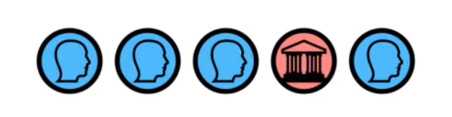

In [ ]:
from IPython.display import Image
Image("C:/Users/cassi/LLM/testBart/EXERCICIOS/Tarefa 3/Moedas.png")

In [ ]:
# Passo 2: Calcular quantas combinações possíveis existem para 4 caras e 1 coroa em 5 lançamentos
combinacoes_4caras = comb(5, 4)  # Isso vale 5 (CCCCK, CCCKC, CCKCC, CKCCC, KCCCC)
#print(combinacoes_4caras)

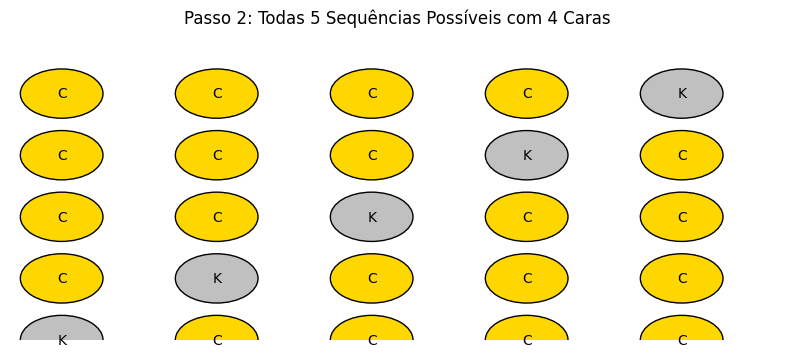

In [ ]:
from IPython.display import Image
Image("C:/Users/cassi/LLM/testBart/EXERCICIOS/passo2_sequencias.png")

In [ ]:
# Passo 3: Calcular a probabilidade de cada sequência com 4 caras
prob_sequencia = moeda_justa ** 5  # (1/2)^5 = 1/32
print(prob_sequencia)
# Passo 4: Probabilidade total de 4 caras
prob_4caras = combinacoes_4caras * prob_sequencia
print(prob_4caras)


0.03125
0.15625


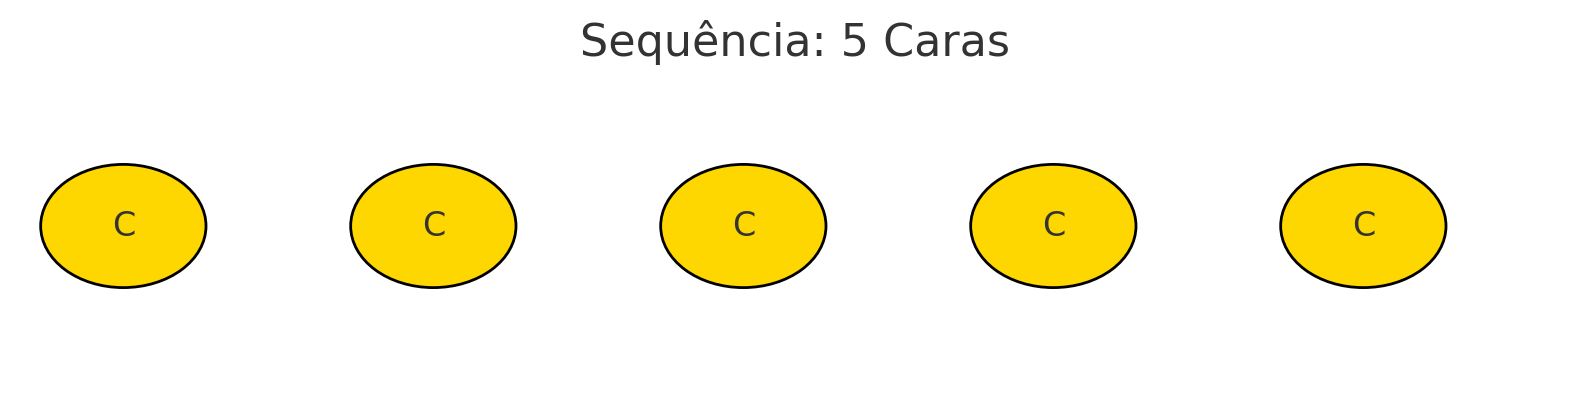

In [ ]:
# Passo 5: Calcular a probabilidade do caso mais extremo (5 caras)
prob_5caras = 1 * prob_sequencia  # Só existe CCCC
from IPython.display import Image
Image("C:/Users/cassi/LLM/testBart/EXERCICIOS/sequencia_5_caras.png")

In [ ]:
# Passo 6: Calcular o p-value (soma das probabilidades extremas)
p_value = prob_4caras + prob_5caras

# Resultados
print("=== Análise Estatística ===")
print(f"Combinações possíveis com 4 caras: {combinacoes_4caras}")
print(f"Probabilidade de cada sequência: {prob_sequencia:.4f} (1/32)")
print(f"Probabilidade de exatamente 4 caras: {prob_4caras:.4f} (5/32)")
print(f"Probabilidade de 5 caras: {prob_5caras:.4f} (1/32)")
print(f"P-value (4+ caras): {p_value:.4f} ou {p_value*100:.2f}%")


=== Análise Estatística ===
Combinações possíveis com 4 caras: 5
Probabilidade de cada sequência: 0.0312 (1/32)
Probabilidade de exatamente 4 caras: 0.1562 (5/32)
Probabilidade de 5 caras: 0.0312 (1/32)
P-value (4+ caras): 0.1875 ou 18.75%


## Tarefa D -Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_1samp

### Parâmetros da Simulação

- **Média da Distribuição Azul** (`media_azul`): `2`  
  Representa o valor médio das amostras geradas a partir da distribuição azul.

- **Média da Distribuição Vermelha** (`media_vermelha`): `0`  
  Valor de referência (hipótese nula). Usado como comparação no teste t para verificar se a média da amostra azul é significativamente diferente.

- **Desvio Padrão** (`desvio_padrao`): `0.5`  
  Mede a dispersão das observações em torno da média. Quanto menor, mais concentrados estão os dados.

- **Número de Amostras** (`num_amostras`): `100`  
  Quantidade de repetições da simulação. Usado para estimar a taxa de falsos negativos ao longo de várias execuções.

- **Tamanho da Amostra** (`tamanho_amostra`): `3`  
  Número de observações em cada amostra gerada da distribuição azul.


In [ ]:
# Parâmetros das distribuições
media_azul = 2
media_vermelha = 0
desvio_padrao = 1
num_amostras = 100
tamanho_amostra = 3

falso negativo 62 e Nº de amostras 100
Taxa de falsos negativos: 62.0%


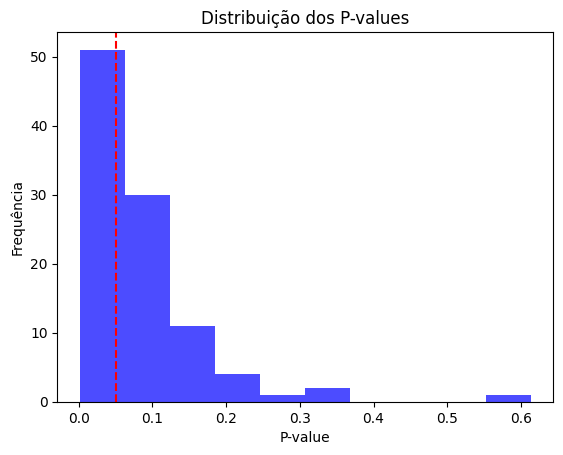

In [ ]:
# Simulação
falsos_negativos = 0
p_values = []
np.random.seed(42)  # para reprodutibilidade

for _ in range(num_amostras):
    # Gerar amostra da distribuição azul
    amostra = np.random.normal(media_azul, desvio_padrao, tamanho_amostra)
    # Teste t para comparar com a média vermelha
    _, p = ttest_1samp(amostra, media_vermelha)
    #print(f"Para amostra {_}º {amostra} -> media {np.mean(amostra)} -> {p}")
    p_values.append(p)

    # Contar falsos negativos (p > 0.05)
    if p > 0.05:
        falsos_negativos += 1

print(f"falso negativo {falsos_negativos} e Nº de amostras {num_amostras}")

# Resultados
taxa_fn = falsos_negativos / num_amostras
print(f"Taxa de falsos negativos: {taxa_fn:.1%}")

# Gráfico simples dos p-values
plt.hist(p_values, bins=10, color='blue', alpha=0.7)
plt.axvline(0.05, color='red', linestyle='--')
plt.title("Distribuição dos P-values")
plt.xlabel("P-value")
plt.ylabel("Frequência")
plt.show()

#### Com uma média real de 2 e tamanho de amostra 3, o teste t falhou em detectar a diferença em 62 de 100 simulações, resultando em uma taxa de falsos negativos de 62%. Isso mostra que, com amostras pequenas, o teste tem baixa chance de identificar efeitos reais. Essa limitação também pode ser observada no gráfico da distribuição dos p-values, onde a linha vermelha representa o limiar de 0,05 (5%).
